# Adiac Spectral Norm

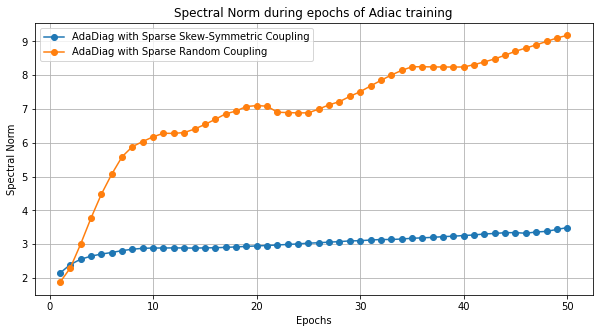

In [ ]:
import json
import matplotlib.pyplot as plt

# ---- USER INPUT ----
# Provide paths to your result.json files
json_paths = [
    "result1.json",
    "best_result_Adiac_AdaDiag.json",
    #"final_search/adiac/rnnassembly/RNNAssemblyTrainable_2025-09-27_13-47-13/RNNAssemblyTrainable_b6b79_00000_0_block_config=3_2025-09-27_13-47-15/result.json",
    #"final_search/adiac/rnnassembly/result2.json"
]

# ---- EXTRACTION ----
spectral_norm_list = []
train_acc_list = []
test_acc_list = []

for path in json_paths:
    with open(path, "r") as f:
        for line in f:
            data = json.loads(line)
            spectral_norm_list.append(data.get("spectral_norm"))
            train_acc_list.append(data.get("train_acc"))
            test_acc_list.append(data.get("test_acc"))



# build two lists for each metric spliting the lists in half
# first half for first json file, second half for second json file
spectral_norm_list_1 = spectral_norm_list[:len(spectral_norm_list)//2]
spectral_norm_list_2 = spectral_norm_list[len(spectral_norm_list)//2:]
train_acc_list_1 = train_acc_list[:len(train_acc_list)//2]
train_acc_list_2 = train_acc_list[len(train_acc_list)//2:]
test_acc_list_1 = test_acc_list[:len(test_acc_list)//2]
test_acc_list_2 = test_acc_list[len(test_acc_list)//2:]


# ---- PLOT SPECTRAL NORM ----
epochs = list(range(1, len(spectral_norm_list) + 1))

plt.figure(figsize=(10, 5))
max_epochs = 50  # Limit x-axis to first 50 epochs
plt.plot(epochs[:max_epochs], spectral_norm_list_2[:max_epochs], marker='o', label='AdaDiag with Sparse Skew-Symmetric Coupling')
plt.plot(epochs[:max_epochs], spectral_norm_list_1[:max_epochs], marker='o', label='AdaDiag with Sparse Random Coupling')
plt.xlabel("Epochs")
plt.ylabel("Spectral Norm")
plt.title("Spectral Norm during epochs of Adiac training")
plt.grid(True)
plt.legend()

# save figure
#plt.savefig("spectral_norm_Adiac_AdaDiag.pdf")
plt.show()


# sMNIST accuracy (SCN vs AdaDiag)

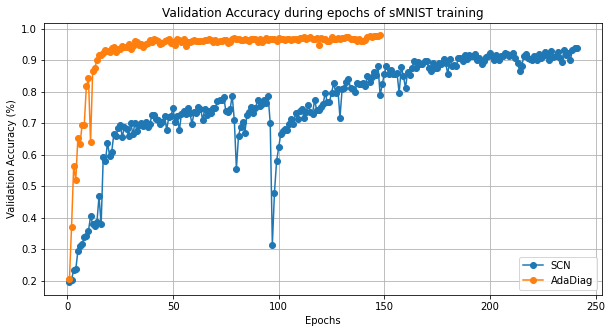

In [ ]:
import json
import matplotlib.pyplot as plt

# ---- USER INPUT ----
# Provide paths to your result.json files
json_paths = [
    "result_best_adadiag.json",
    "result_best_scn.json",
    #"final_search/smnist/rnnassembly/RNNAssemblyTrainable_2025-09-11_11-59-28/RNNAssemblyTrainable_01605_00008_8_activation=relu,block_config=3,block_sizes=32_32_32_32_32_32_32_32_32_32_32_32_32_32_32_32,bloc_2025-09-11_11-59-28/result.json",
    #"final_search/smnist/rnnassembly/RNNAssemblyTrainable_2025-09-11_21-46-00/RNNAssemblyTrainable_f1900_00052_52_activation=relu,block_config=2,block_sizes=32_32_32_32_32_32_32_32_32_32_32_32_32_32_32_32,cou_2025-09-11_21-46-02/result.json",
]

# ---- EXTRACTION ----
spectral_norm_list = []
train_acc_list = []
test_acc_list = []

for path in json_paths:
    with open(path, "r") as f:
        for line in f:
            data = json.loads(line)
            spectral_norm_list.append(data.get("spectral_norm"))
            train_acc_list.append(data.get("train_acc"))
            test_acc_list.append(data.get("test_acc"))



# build two lists for each metric spliting the lists in half
# first half for first json file, second half for second json file
spectral_norm_list_1 = spectral_norm_list[:len(spectral_norm_list)//2]
spectral_norm_list_2 = spectral_norm_list[len(spectral_norm_list)//2:]
train_acc_list_1 = train_acc_list[:len(train_acc_list)//2]
train_acc_list_2 = train_acc_list[len(train_acc_list)//2:]
test_acc_list_1 = test_acc_list[:len(test_acc_list)//2]
test_acc_list_2 = test_acc_list[len(test_acc_list)//2:]


# ---- PLOT SPECTRAL NORM ----
epochs = list(range(1, len(spectral_norm_list) + 1))

plt.figure(figsize=(10, 5))
max_epochs = 148  # Limit x-axis to first 50 epochs
max_epochs_scn = 241  # Limit x-axis to first 50 epochs
# test accuracies
plt.plot(epochs[:max_epochs_scn], test_acc_list_2[:max_epochs_scn], marker='o', label='SCN')
plt.plot(epochs[:max_epochs], test_acc_list_1[:max_epochs], marker='o', label='AdaDiag')
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy (%)")
plt.title("Validation Accuracy during epochs of sMNIST training")
plt.grid(True)
plt.legend()

# save figure
#plt.savefig("spectral_norm_Adiac_AdaDiag.pdf")
#plt.savefig("validation_accuracy_sMNIST_SCN_vs_AdaDiag.pdf")

plt.show()

# Frequencies FordB (initialisation vs best epoch)

Min: 0.05227770656347275, Max: 0.14790460467338562
Maximum std among neurons: tensor(0.0257)
Min: 0.0016844605561345816, Max: 0.18579483032226562
Maximum std among neurons: tensor(0.0320)


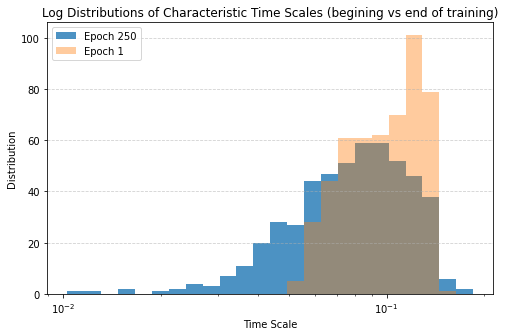

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# ---- CHOOSE TWO EPOCHS ----
epoch_1 = 0
epoch_2 = 249 # 158 249

# Storage for histograms
distributions = {}

for epoch in [epoch_1, epoch_2]:
    tensor_path = f"gated_steps_epoch_{epoch}.pt"
    data = torch.load(tensor_path)

    tensor = torch.stack(data)   # shape: (1, 500, 512)
    tensor = tensor.squeeze(0) 
    neuron_std = torch.std(tensor,dim=1).squeeze()

    # Convert to numpy
    tensor = tensor.cpu().numpy()

    print(f"Min: {tensor.min()}, Max: {tensor.max()}")
    print("Maximum std among neurons:", torch.max(neuron_std))

    given_step = 42  # Choose time step
    distributions[epoch] = tensor[given_step]

# ---- PLOT BOTH HISTOGRAMS TOGETHER ----
bins_2 = 42 
bins_1 = 20 

# Ensure strictly positive values for log scale
min_val = min(distributions[epoch_1].min(), distributions[epoch_2].min())
max_val = max(distributions[epoch_1].max(), distributions[epoch_2].max())
min_val = max(min_val, 1e-6)
n_bins = 25
bins = np.logspace(np.log10(min_val), np.log10(max_val), n_bins)
bins_1, bins_2 = bins, bins

plt.figure(figsize=(8,5))
plt.hist(distributions[epoch_2], bins=bins_2, alpha=0.8, label=f"Epoch {epoch_2+1}")
plt.hist(distributions[epoch_1], bins=bins_1, alpha=0.4, label=f"Epoch {epoch_1+1}")
plt.xlabel("Time Scale")
plt.ylabel("Distribution")
plt.title(f"Log Distributions of Characteristic Time Scales (begining vs end of training)")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)
# Logarithmic x-axis
plt.xscale('log')

# save figure
#plt.savefig("log_distribution_timescales.pdf")

plt.show()